In [7]:
import pandas as pd
import re
import os
df = pd.read_feather("data/included_studies.feather")
df['attr_year'] = df['publication_year'] - 1
df.head()

,id,title,abstract,publication_year,0 - relevant,2 - 1.02. Changes in temperature,2 - 1.03. Seasonal change,2 - 1.04. Changes in precipitation,2 - 1.06. Climate change (unspecified),2 - 1.07. Other meteorological variables,...,4 - 2.05. Scenarios,5 - 4.01. Floods and drought,5 - 4.02. Heatwaves,5 - 4.03. Wildfires,5 - 4.04. Other extreme events,5 - 4.05. Extreme cold,6 - 5.01. Pollution,6 - 5.03. Reduced agricultural & aquaculture productivity,6 - 5.04. Reduced labour and physical capacity,attr_year
0,W2021823358,Projections of heat waves with high impact on ...,"Climate change will result in more intense, mo...",2014.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2013.0
1,W2129447349,Apparent Temperature and Cause-Specific Mortal...,"Temperature, a key climate change indicator, i...",2011.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0
2,W2345489509,Climate Change and the Emergent Epidemic of CK...,Climate change has led to significant rise of ...,2016.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2015.0
3,W2093213412,Children are likely to suffer most from our fo...,BACKGROUND: The periods of fetal and child dev...,2008.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007.0
4,W615562828,Autochthonous Chikungunya Transmission and Ext...,Background Extreme precipitation events are in...,2015.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0


In [8]:
grid_df = pd.read_csv('data/grid_df.csv')
grid_df

,index,LAT,LON,area,is_land,precip_da,temp_da,population
0,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0
1,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0
2,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0
3,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0
4,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
10363,10363,88.75,168.75,1685.654015,False,NaN,NaN,0.0
10364,10364,88.75,171.25,1685.654015,False,NaN,NaN,0.0
10365,10365,88.75,173.75,1685.654015,False,NaN,NaN,0.0
10366,10366,88.75,176.25,1685.654015,False,NaN,NaN,0.0


In [9]:
grid_df = pd.read_csv('data/dynamic_grid_df.csv')
grid_df

,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,temp_da,population
0,87.5,-177.5,0.0,1990,10080,86.25,-178.75,5053.753306,False,NaN,NaN,0.0
1,87.5,-177.5,0.0,1990,10081,86.25,-176.25,5053.753306,False,NaN,NaN,0.0
2,87.5,-177.5,0.0,1990,10224,88.75,-178.75,1685.654015,False,NaN,NaN,0.0
3,87.5,-177.5,0.0,1990,10225,88.75,-176.25,1685.654015,False,NaN,NaN,0.0
4,87.5,-172.5,0.0,1990,10082,86.25,-173.75,5053.753306,False,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
352507,-87.5,172.5,2.0,2023,285,-86.25,173.75,5053.753306,False,NaN,NaN,0.0
352508,-87.5,177.5,2.0,2023,142,-88.75,176.25,1685.654015,False,NaN,NaN,0.0
352509,-87.5,177.5,2.0,2023,143,-88.75,178.75,1685.654015,False,NaN,NaN,0.0
352510,-87.5,177.5,2.0,2023,286,-86.25,176.25,5053.753306,False,NaN,NaN,0.0


In [11]:
# Now we load our index of studies to grid cells, and generate a column which for each document-place combo is
# 1 / the number of grid cells it appears in 
shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(
    df[['id','attr_year']].rename(columns={'id':'doc_id'})
).merge(
    grid_df[["index","area","population","precip_da","temp_da","temp_da_dynamic","year"]], left_on=["grid_df_id",'attr_year'], right_on=["index",'year']
)
shp_df_matches["doc_share"] = shp_df_matches.groupby("doc_id")["area"].transform(
    lambda x: x / x.sum()
)
shp_df_matches["doc_share_km10000"] = shp_df_matches["doc_share"] / (shp_df_matches["area"]/10000)
shp_df_matches["doc_share_pp"] = shp_df_matches["doc_share"] / (shp_df_matches["population"]/1e6)
shp_df_matches

/tmp/ipykernel_60539/638119048.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  shp_df_matches = pd.read_csv("data/shp_df_matches.csv").merge(


,grid_df_id,doc_id,shp_id,place,attr_year,index,area,population,precip_da,temp_da,temp_da_dynamic,year,doc_share,doc_share_km10000,doc_share_pp
0,6281,W2291458255,1710.0,'asir region,2007.0,6281,73170.065846,3306124.80,NaN,2.0,2.0,2007,0.035873,0.004903,0.010851
1,6281,W2223796613,1710.0,'asir region,2014.0,6281,73170.065846,3306124.80,NaN,2.0,2.0,2014,0.035873,0.004903,0.010851
2,6281,W1531434374,1710.0,'asir region,2010.0,6281,73170.065846,3306124.80,NaN,2.0,2.0,2010,0.034844,0.004762,0.010539
3,5547,W3121154669,4317.0,abia state,2019.0,5547,76811.546551,27020884.00,NaN,2.0,2.0,2019,0.083961,0.010931,0.003107
4,5547,W2896162841,4317.0,abia state,2017.0,5547,76811.546551,27020884.00,NaN,2.0,2.0,2017,0.083961,0.010931,0.003107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669900,7093,W2464419816,NaN,coosa river,1995.0,7093,64248.337217,4563782.00,0.0,0.0,0.0,1995,0.005576,0.000868,0.001222
1669901,7852,W2182955483,NaN,teatro scientifico del bibiena,2008.0,7852,53433.779588,6104070.00,0.0,2.0,2.0,2008,0.479102,0.089663,0.078489
1669902,3969,W2119670518,NaN,makgadikgadi pans,2009.0,3969,72017.010590,114366.39,NaN,NaN,0.0,2009,0.005422,0.000753,0.047411
1669903,7531,W2102577708,NaN,what cherr farm (historical),2007.0,7531,58095.277049,4591156.50,0.0,2.0,2.0,2007,0.064175,0.011046,0.013978


In [14]:
# Here we define a function that takes a dataframe and returns a grid cell dataframe with the weighted 
# number of studies from that dataframe in each cell
def sum_studies(df, shp_df_matches, grid_df, name):
    sums = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_share_km10000"].sum()
    ).to_frame(name).reset_index().rename(columns={"grid_df_id": "index"})
    pc_sums = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_share_pp"].sum()
    ).to_frame(f"{name}_pp").reset_index().rename(columns={"grid_df_id": "index"})
    counts = (shp_df_matches[shp_df_matches["doc_id"].isin(df["id"])]
     .groupby("grid_df_id")["doc_id"].nunique()
    ).to_frame(f"{name}_count").reset_index().rename(columns={"grid_df_id": "index"})

    return grid_df.merge(sums, how="outer").merge(counts, how="outer").merge(pc_sums, how="outer")

dynamic_study_grid_df = sum_studies(df, shp_df_matches, grid_df, "all_studies")
print(dynamic_study_grid_df.shape)
dynamic_study_grid_df.head()

(352512, 15)


,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,temp_da,population,all_studies,all_studies_count,all_studies_pp
0,-87.5,-177.5,0.0,1990,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
1,-87.5,-177.5,0.0,1991,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
2,-87.5,-177.5,2.0,1992,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
3,-87.5,-177.5,2.0,1993,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN
4,-87.5,-177.5,2.0,1994,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN


In [5]:
# study_grid_df = sum_studies(
#     df[df["19 - Precipitation - prediction_mean"]>=0.5], shp_df_matches, study_grid_df, "precip_studies"
# )
# study_grid_df = sum_studies(
#     df[df["19 - Temperature - prediction_mean"]>=0.5], shp_df_matches, study_grid_df, "temp_studies"
# )

# impact_cols = [x for x in df.columns if re.match("^12 -", x) and "mean" in x]
# impact_labels = []
# for c in impact_cols:
#     clabel = f"{c.split(' - ')[1]}_studies"
#     study_grid_df = sum_studies(
#         df[df[c]>=0.5], shp_df_matches, study_grid_df, clabel
#     )
#     impact_labels.append(clabel)
    
# study_grid_df.head()

In [18]:
study_grid_df = dynamic_study_grid_df[dynamic_study_grid_df['year']==2023]

/tmp/ipykernel_60539/203544060.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_grid_df["land_studies"] = study_grid_df["all_studies"]


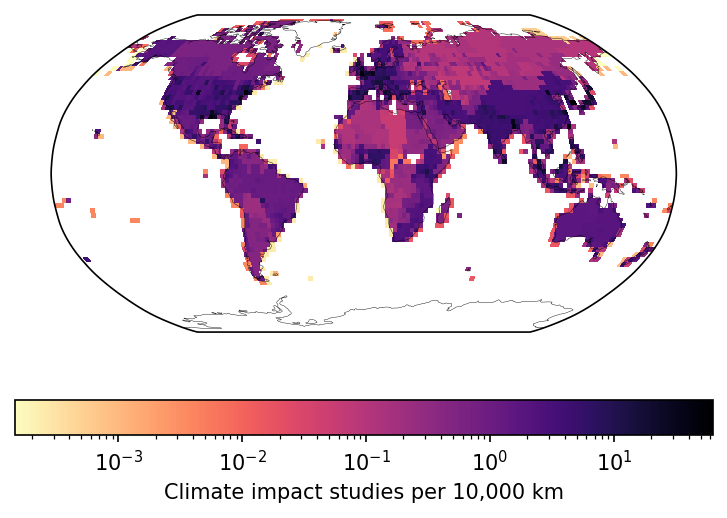

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
from matplotlib import colormaps

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines(lw=0.2)

study_grid_df["land_studies"] = study_grid_df["all_studies"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=colormaps['magma_r'],
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)





cbar = plt.colorbar(mesh, orientation="horizontal")
cbar.set_label("Climate impact studies per 10,000 km")
plt.savefig('figures/density_gridcells.pdf', bbox_inches='tight')

In [20]:
drivers = [x for x in df.columns if re.match('^2 -',x)]
for i, driver in enumerate(drivers):
    print(driver)
    group = df[df[driver]>=0.5]
    study_grid_df = study_grid_df.merge(sum_studies(group, shp_df_matches, grid_df, f"{driver}_studies"))
study_grid_df.head()

2 - 1.02. Changes in temperature
2 - 1.03. Seasonal change
2 - 1.04. Changes in precipitation
2 - 1.06. Climate change (unspecified)
2 - 1.07. Other meteorological variables


,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,...,2 - 1.03. Seasonal change_studies_pp,2 - 1.04. Changes in precipitation_studies,2 - 1.04. Changes in precipitation_studies_count,2 - 1.04. Changes in precipitation_studies_pp,2 - 1.06. Climate change (unspecified)_studies,2 - 1.06. Climate change (unspecified)_studies_count,2 - 1.06. Climate change (unspecified)_studies_pp,2 - 1.07. Other meteorological variables_studies,2 - 1.07. Other meteorological variables_studies_count,2 - 1.07. Other meteorological variables_studies_pp
0,-87.5,-177.5,2.0,2023,0,-88.75,-178.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-87.5,-177.5,2.0,2023,1,-88.75,-176.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-87.5,-172.5,2.0,2023,2,-88.75,-173.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-87.5,-172.5,2.0,2023,3,-88.75,-171.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-87.5,-167.5,2.0,2023,4,-88.75,-168.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
impacts = [x for x in df.columns if re.match('^3 -',x)]
for i, impact in enumerate(impacts):
    print(impact)
    group = df[df[impact]>=0.5]
    study_grid_df = study_grid_df.merge(sum_studies(group, shp_df_matches, grid_df, f"{impact}_studies"))
study_grid_df.head()

3 - 2.01. Food security
3 - 2.02. Mental health and sentiment
3 - 2.03. Cardiorespiratory disease
3 - 2.04. Direct injury and death
3 - 2.05. Infectious diseases
3 - 2.06. Other health impacts
3 - 2.07. Water security
3 - 2.08. Mortality and morbidity
3 - 2.09. Health system capacity


,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,...,3 - 2.06. Other health impacts_studies_pp,3 - 2.07. Water security_studies,3 - 2.07. Water security_studies_count,3 - 2.07. Water security_studies_pp,3 - 2.08. Mortality and morbidity_studies,3 - 2.08. Mortality and morbidity_studies_count,3 - 2.08. Mortality and morbidity_studies_pp,3 - 2.09. Health system capacity_studies,3 - 2.09. Health system capacity_studies_count,3 - 2.09. Health system capacity_studies_pp
0,-87.5,-177.5,2.0,2023,0,-88.75,-178.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-87.5,-177.5,2.0,2023,1,-88.75,-176.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-87.5,-172.5,2.0,2023,2,-88.75,-173.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-87.5,-172.5,2.0,2023,3,-88.75,-171.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-87.5,-167.5,2.0,2023,4,-88.75,-168.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


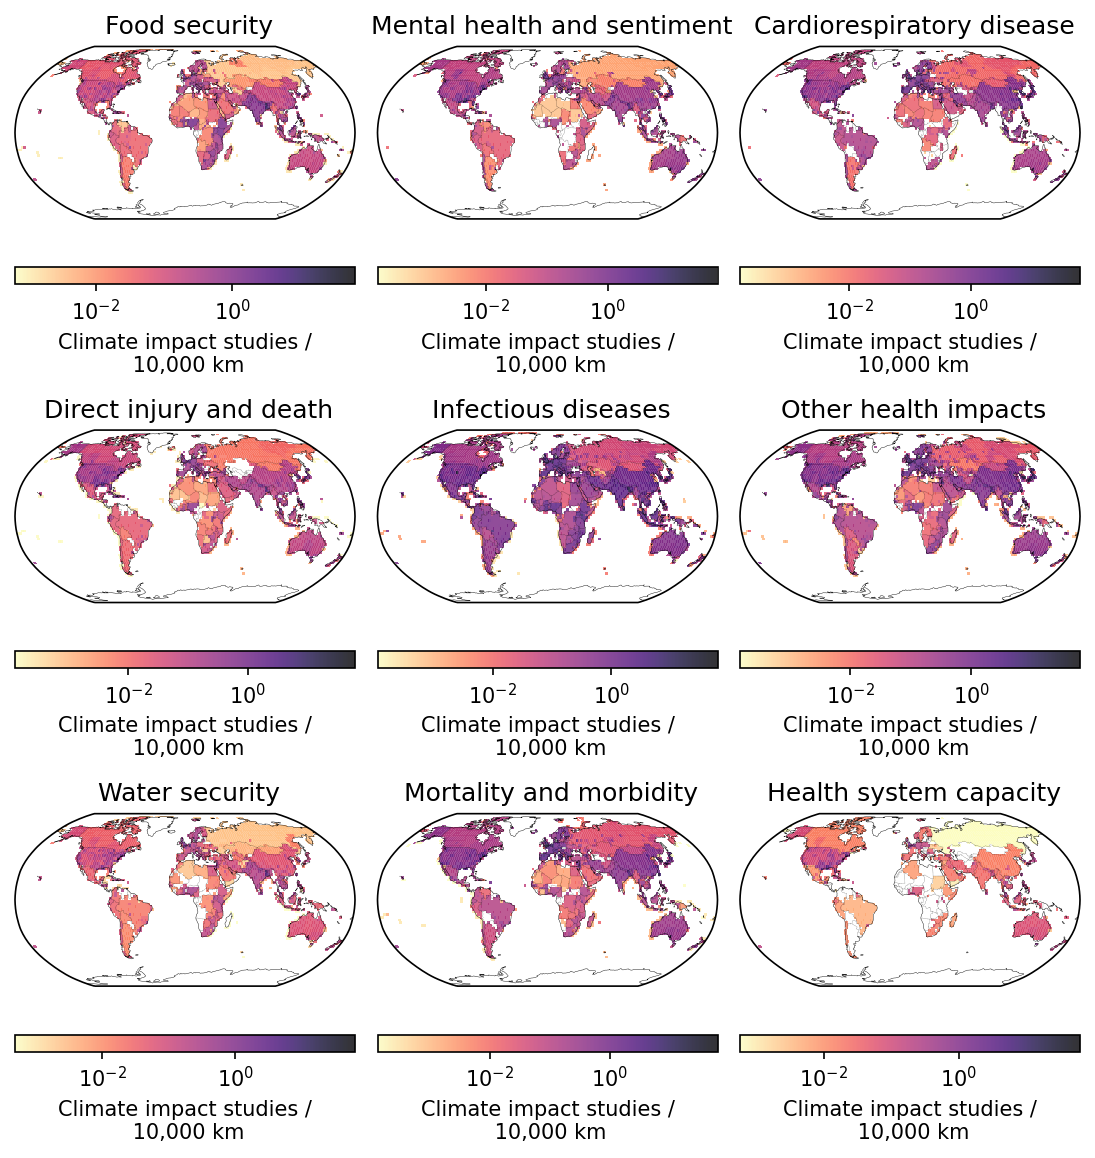

In [9]:
from cartopy import feature

p = ccrs.Robinson()



fig, axs = plt.subplots(3,3, figsize=(7.4,8), subplot_kw={'projection': p}, dpi=150)
axs=axs.flatten()



for i, impact in enumerate(impacts):
    ax = axs[i]
    ax.set_title(impact.split('.')[2])

    ax.coastlines(lw=0.2)

    study_grid_df["land_studies"] = study_grid_df[f"{impact}_studies"]
    study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN

    shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

    n = np.array(study_grid_df.land_studies).reshape(shape)

    mesh=ax.pcolormesh(
        study_grid_df.LON.unique(), 
        study_grid_df.LAT.unique(), 
        n, 
        cmap=colormaps['magma_r'],
        norm=mpl.colors.LogNorm(vmax=study_grid_df.all_studies.max()),
        transform=ccrs.PlateCarree(),
        alpha=0.8
    )
    ax.add_feature(feature.BORDERS, lw=0.2, linestyle=':')

    # cbar = plt.colorbar(mesh, orientation="horizontal")
    # cbar.set_label("Climate impact studies per 10,000 km")
    
    cbar = plt.colorbar(mesh, orientation="horizontal")
    cbar.set_label("Climate impact studies /\n 10,000 km")

fig.tight_layout()

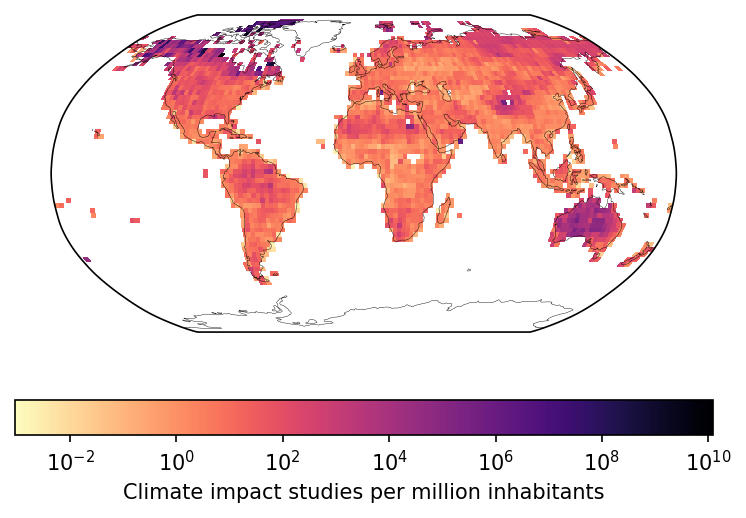

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import numpy as np
from matplotlib import colormaps

fig = plt.figure(dpi=150)
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.coastlines(lw=0.2)

study_grid_df["land_studies"] = study_grid_df["all_studies_pp"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=colormaps['magma_r'],
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree(),
)



cbar = plt.colorbar(mesh, orientation="horizontal")
cbar.set_label("Climate impact studies per million inhabitants")


In [27]:
for orig_var in ["temp_da", "precip_da","temp_da_dynamic"]:
    simp_var = f"{orig_var}_simplified"
    grid_df[simp_var] = grid_df[orig_var]
    grid_df.loc[grid_df[orig_var].isin([2,3]), simp_var] = 1
    grid_df.loc[grid_df[orig_var].isin([-2,-3]), simp_var] = -1
    grid_df.loc[grid_df[orig_var].isin([-4, 4]), simp_var] = 0
grid_df.head()

/tmp/ipykernel_60539/3653848408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_df[simp_var] = grid_df[orig_var]
/tmp/ipykernel_60539/3653848408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_df[simp_var] = grid_df[orig_var]


,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,temp_da,population,all_studies,all_studies_count,all_studies_pp,temp_da_simplified,precip_da_simplified,temp_da_dynamic_simplified
33,-87.5,-177.5,2.0,2023,0,-88.75,-178.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
67,-87.5,-177.5,2.0,2023,1,-88.75,-176.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
101,-87.5,-172.5,2.0,2023,2,-88.75,-173.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
135,-87.5,-172.5,2.0,2023,3,-88.75,-171.25,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0
169,-87.5,-167.5,2.0,2023,4,-88.75,-168.75,1685.654015,False,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0


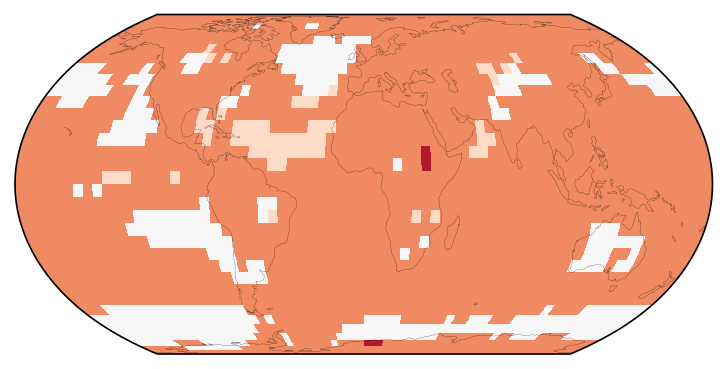

In [28]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

def plot_da(df, ax, da_var, colors=['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"], vmin=-4, vmax=4):
    
    ax.coastlines(lw=0.1)

    bn = np.zeros((len(df.LAT.unique()), len(df.LON.unique())))
    bn+=1
    mesh = ax.pcolormesh(
        df.LON.unique(),#-degrees*0.5,
        df.LAT.unique(),#-degrees*0.5,
        bn,
        cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
        transform=ccrs.PlateCarree(),
    )
    
    n = np.array(df[da_var]).reshape(len(df.LAT.unique()),len(df.LON.unique()))
    mesh = ax.pcolormesh(
        df.LON.unique(),
        df.LAT.unique(),
        n,
        cmap=mpl.colors.ListedColormap(colors),
        vmin=vmin, vmax=vmax,
        transform=ccrs.PlateCarree(),
    )
    
    return mesh

precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
    
plot_da(grid_df, ax, 'temp_da_dynamic', precip_colors[::-1])

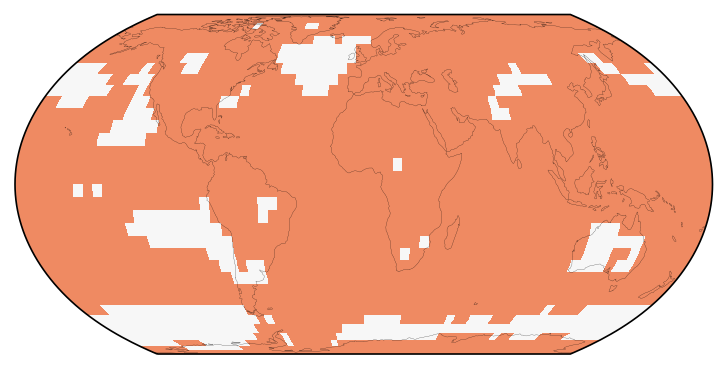

In [29]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

s_precip_colors = ['#ef8a62','#f7f7f7','#67a9cf']
plot_da(grid_df, ax, 'temp_da_dynamic_simplified', s_precip_colors[::-1], -1, 1)

(0.0, 1.0)


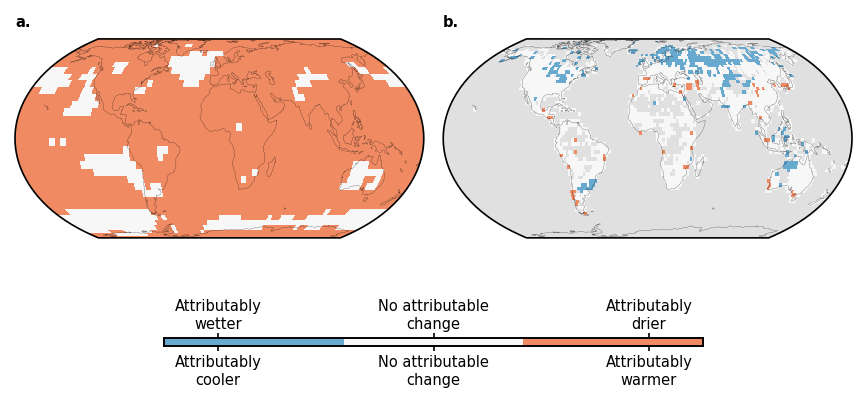

In [30]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,3), dpi=150, constrained_layout=False)
w_r = [1,2,2,1]

h_r = [1.25,0.1]
gs = fig.add_gridspec(2, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_dynamic_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(grid_df, axb, 'precip_da_simplified', s_precip_colors, -1, 1)

## Cbar
cax = plt.subplot(gs[1,1:3])

def s_double_cbar(mesh, cax, frac):
    cax.axis('off')

    cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

    #cax.axis('off')
    cax2 = cax.twiny()
    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
        ticks=np.linspace(-.8,.8,3),
    )
    cax.set_xticklabels(["Attributably\ncooler", "No attributable\nchange", "Attributably\nwarmer"])


    
    
    cax2.set_xlim(-1,1)
    cax2.set_xticks(np.linspace(-.8,.8,3))
    cax2.set_xticklabels(["Attributably\nwetter", "No attributable\nchange", "Attributably\ndrier"], fontsize=7)
    cax2.xaxis.set_tick_params(pad=1,length=2.5)
    cax.xaxis.set_tick_params(pad=1.5,length=2.5)
#     cax2.set_xlabel('D&A category - precipitation (wetter/drier)', fontsize=7,labelpad=3)
#     cbar.set_label('D&A category - temperature (colder/warmer)', fontsize=7, labelpad=2)

    cbar.ax.tick_params(labelsize=7)

    print(cax.get_ylim())
    
s_double_cbar(mesh, cax, 0.4)

/tmp/ipykernel_60539/3023878237.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('magma_r'),


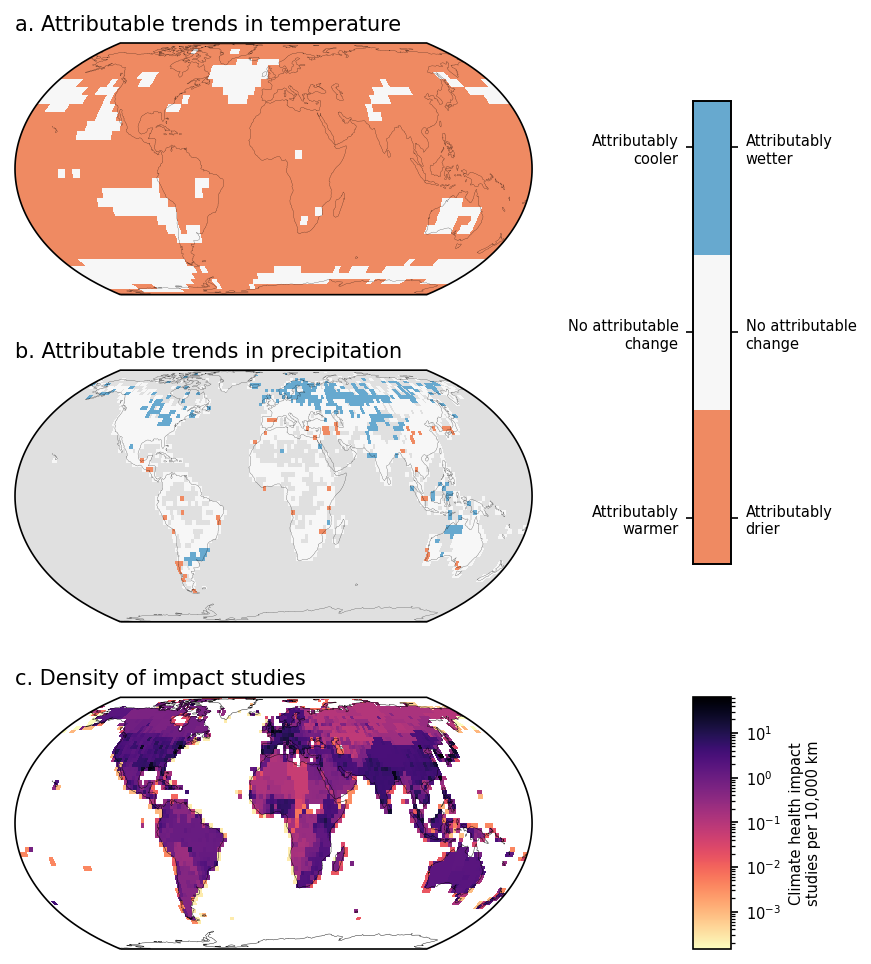

In [31]:
import itertools
from matplotlib.patches import Rectangle, Patch
import cartopy.feature as cfeature

title_fs = 10

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,8), dpi=150, constrained_layout=False)
w_r = [1,.05]

h_r = [1,1,1]
gs = fig.add_gridspec(3, 2, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.3)

############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0], projection=ccrs.EqualEarth())
axa.set_title('a. Attributable trends in temperature', fontsize=title_fs, loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_dynamic_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precip

axa = plt.subplot(gs[1,0], projection=ccrs.EqualEarth())
axa.set_title('b. Attributable trends in precipitation', fontsize=title_fs, loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'precip_da_simplified', s_precip_colors, -1, 1)

frac = 0.8
cax = plt.subplot(gs[:2, 1])
cax.axis('off')

cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

#cax.axis('off')

cbar = plt.colorbar(
    mesh, cax=cax, 
    ticks=np.linspace(-.8,.8,3),
)
cax.set_yticklabels(["Attributably\nwarmer", "No attributable\nchange", "Attributably\ncooler"], fontsize=7)

cax2 = cax.twinx()


cax2.set_ylim(-1,1)
cax2.set_yticks(np.linspace(-.8,.8,3))
cax2.set_yticklabels(["Attributably\ndrier", "No attributable\nchange", "Attributably\nwetter"], fontsize=7)
# cax2.xaxis.set_tick_params(pad=1,length=2.5)
# cax.xaxis.set_tick_params(pad=1.5,length=2.5)
# #     cax2.set_xlabel('D&A category - precipitation (wetter/drier)', fontsize=7,labelpad=3)
# #     cbar.set_label('D&A category - temperature (colder/warmer)', fontsize=7, labelpad=2)

# cbar.ax.tick_params(labelsize=7)


## Plot study density

ax = plt.subplot(gs[2,0],projection=ccrs.EqualEarth())
ax.set_title('c. Density of impact studies', fontsize=title_fs, loc="left" )
ax.coastlines(lw=0.2)
#ax.add_feature(cfeature.BORDERS, ls="--", color="grey", lw=0.5)

shape = (len(study_grid_df.LAT.unique()), len(study_grid_df.LON.unique()))

study_grid_df["land_studies"] = study_grid_df["all_studies"]
study_grid_df.loc[study_grid_df["is_land"]!=True, "land_studies"] = np.NaN
n = np.array(study_grid_df.land_studies).reshape(shape)

mesh=ax.pcolormesh(
    study_grid_df.LON.unique(), 
    study_grid_df.LAT.unique(), 
    n, 
    cmap=plt.cm.get_cmap('magma_r'),
    norm=mpl.colors.LogNorm(),
    transform=ccrs.PlateCarree()
)

cax = plt.subplot(gs[2,1])

cbar = plt.colorbar(mesh, orientation="vertical", cax=cax)
cax.tick_params(labelsize=7)
cbar.set_label("Climate health impact\nstudies per 10,000 km", fontsize=7)



In [34]:
study_grid_df['precip_da_cat'] = abs(study_grid_df['precip_da']).fillna(0)
study_grid_df['temp_da_cat'] = abs(study_grid_df['temp_da_dynamic']).fillna(0)

study_grid_df['temp_da_binary'] = np.where(abs(study_grid_df['temp_da_cat']).isin([2,3]),1,0)
study_grid_df['precip_da_binary'] = np.where(abs(study_grid_df['precip_da_cat']).isin([2,3]),1,0)

study_grid_df["n_da_impacts"] = study_grid_df[['temp_da_binary','precip_da_binary']].sum(axis=1)

study_grid_df["max_da_cat"] = np.max(study_grid_df[['precip_da_cat','temp_da_cat']],axis=1)
study_grid_df

,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,...,3 - 2.08. Mortality and morbidity_studies_pp,3 - 2.09. Health system capacity_studies,3 - 2.09. Health system capacity_studies_count,3 - 2.09. Health system capacity_studies_pp,precip_da_cat,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat
0,-87.5,-177.5,2.0,2023,0,-88.75,-178.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
1,-87.5,-177.5,2.0,2023,1,-88.75,-176.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
2,-87.5,-172.5,2.0,2023,2,-88.75,-173.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
3,-87.5,-172.5,2.0,2023,3,-88.75,-171.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
4,-87.5,-167.5,2.0,2023,4,-88.75,-168.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10363,87.5,167.5,2.0,2023,10363,88.75,168.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
10364,87.5,172.5,2.0,2023,10364,88.75,171.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
10365,87.5,172.5,2.0,2023,10365,88.75,173.75,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0
10366,87.5,177.5,2.0,2023,10366,88.75,176.25,1685.654015,False,NaN,...,NaN,NaN,NaN,NaN,0.0,2.0,1,0,1,2.0


<Axes: >

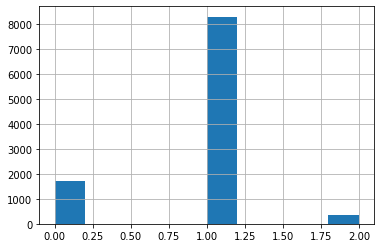

In [35]:
study_grid_df['n_da_impacts'].hist()

In [36]:
study_grid_df.loc[
    (study_grid_df['precip_da_cat'].isin([2,3])) &
    (study_grid_df['temp_da_cat'].isin([2,3])),
    "study_addition"
] = "add" 

study_grid_df.loc[
    (~study_grid_df['precip_da_cat'].isin([2,3])) &
    (~study_grid_df['temp_da_cat'].isin([2,3])),
    "study_addition"
] = "add" 

study_grid_df.loc[
    (study_grid_df['precip_da_cat'].isin([2,3])) &
    (~study_grid_df['temp_da_cat'].isin([2,3])),
    "study_addition" 
] = "precip" 

study_grid_df.loc[
    (~study_grid_df['precip_da_cat'].isin([2,3])) &
    (study_grid_df['temp_da_cat'].isin([2,3])),
    "study_addition"  
] = "temp"

study_grid_df.loc[study_grid_df['study_addition']=="temp","total_study_prop"] = study_grid_df.loc[study_grid_df['study_addition']=="temp","2 - 1.02. Changes in temperature_studies"]
study_grid_df.loc[study_grid_df['study_addition']=="precip","total_study_prop"] = study_grid_df.loc[study_grid_df['study_addition']=="precip","2 - 1.04. Changes in precipitation_studies"]
study_grid_df.loc[study_grid_df['study_addition']=="add","total_study_prop"] = study_grid_df.loc[study_grid_df['study_addition']=="add",["2 - 1.04. Changes in precipitation_studies","2 - 1.02. Changes in temperature_studies"]].sum(axis=1)

study_grid_df.loc[study_grid_df['study_addition']=="temp","total_study_pp"] = study_grid_df.loc[study_grid_df['study_addition']=="temp","2 - 1.02. Changes in temperature_studies_pp"]
study_grid_df.loc[study_grid_df['study_addition']=="precip","total_study_pp"] = study_grid_df.loc[study_grid_df['study_addition']=="precip","2 - 1.04. Changes in precipitation_studies_pp"]
study_grid_df.loc[study_grid_df['study_addition']=="add","total_study_pp"] = study_grid_df.loc[study_grid_df['study_addition']=="add",["2 - 1.04. Changes in precipitation_studies_pp","2 - 1.02. Changes in temperature_studies_pp"]].sum(axis=1)


print(study_grid_df.groupby('study_addition').index.count())

print(study_grid_df['total_study_prop'].mean())

study_grid_df.head()

study_addition
add       2078
precip      69
temp      8221
Name: index, dtype: int64
0.3978593266179648


,LAT_5,LON_5,temp_da_dynamic,year,index,LAT,LON,area,is_land,precip_da,...,3 - 2.09. Health system capacity_studies_pp,precip_da_cat,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,total_study_pp
0,-87.5,-177.5,2.0,2023,0,-88.75,-178.75,1685.654015,False,NaN,...,NaN,0.0,2.0,1,0,1,2.0,temp,NaN,NaN
1,-87.5,-177.5,2.0,2023,1,-88.75,-176.25,1685.654015,False,NaN,...,NaN,0.0,2.0,1,0,1,2.0,temp,NaN,NaN
2,-87.5,-172.5,2.0,2023,2,-88.75,-173.75,1685.654015,False,NaN,...,NaN,0.0,2.0,1,0,1,2.0,temp,NaN,NaN
3,-87.5,-172.5,2.0,2023,3,-88.75,-171.25,1685.654015,False,NaN,...,NaN,0.0,2.0,1,0,1,2.0,temp,NaN,NaN
4,-87.5,-167.5,2.0,2023,4,-88.75,-168.75,1685.654015,False,NaN,...,NaN,0.0,2.0,1,0,1,2.0,temp,NaN,NaN


[Text(50, 0, '50'), Text(100, 0, '100'), Text(500, 0, '500')]

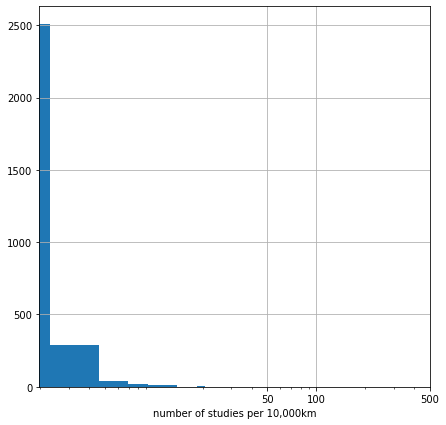

In [37]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(figsize=(7,7))
mask = study_grid_df['is_land']


study_grid_df[mask]['total_study_prop'].hist(bins=20)

ax.set_xlabel('number of studies per 10,000km')
ax.set_xscale('log')

ts = [50,100,500]
ax.set_xticks(ts)
ax.set_xticklabels(ts)

#ax.grid()

In [38]:
np.arange(1,step=0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [39]:
study_grid_df[mask]['total_study_prop'].quantile(np.arange(1,step=0.1))

0.0    0.000000
0.1    0.013536
0.2    0.062182
0.3    0.093791
0.4    0.164383
0.5    0.317560
0.6    0.528712
0.7    0.894717
0.8    1.509275
0.9    2.633454
Name: total_study_prop, dtype: float64

In [40]:
study_grid_df[mask]['total_study_pp'].quantile(np.arange(1,step=0.1))

0.0       0.000000
0.1       0.302851
0.2       0.922017
0.3       1.744769
0.4       3.501164
0.5       6.798631
0.6      15.669499
0.7      42.694181
0.8     206.156166
0.9    4215.297748
Name: total_study_pp, dtype: float64

In [41]:



#lots = 5
#little =1

def cat_evidence(df, lots, little, var):

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df[var]<little),"evidence_cat"
    ] = 1

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df[var]>=little),"evidence_cat"
    ] = 2

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df[var]>=lots),"evidence_cat"
    ] = 3

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df[var]<little),"evidence_cat"
    ] = 4

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df[var]>=little),"evidence_cat"
    ] = 5

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df[var]>=lots),"evidence_cat"
    ] = 6
    
    return df



In [57]:
def inset_figure(ax, df, colors):
    
    area_sums = df[df['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
    area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

    pop_sums = df.groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
    pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
    bottoms = {0: 0.0, 1: 0.0}
    
    handles = []

    hatch_types = ["","","/////"]

    offsets = [0.1,-0.1]

    with mpl.rc_context(rc={'hatch.linewidth': 2}):

        for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
            x = name//4
            for j, group in group.groupby('n_da_impacts'):
                y = group['prop'].values[0]
                bar = axins.bar(
                    x+offsets[int(x)],y, bottom=bottoms[x], 
                    color=colors[i], hatch=hatch_types[j],
                    edgecolor="black",
                    linewidth=0.5,
                    width=0.6
                )
                bottoms[x]+=y
                if i == 1:
                    handles.append(bar)

        bottoms = {0: 0.0, 1: 0.0}

        for i, (name, group) in enumerate(pop_sums.groupby('evidence_cat')):
            x = name//4
            for j, group in group.groupby('n_da_impacts'):
                y = group['prop'].values[0]
                axins.bar(
                    x+2+offsets[int(x)],y, bottom=bottoms[x], 
                    color=colors[i], hatch=hatch_types[j],
                    edgecolor="black",
                    linewidth=0.5,
                    width=0.6
                )
                bottoms[x]+=y

    axins.set_xticks([0.5,2.5])

    da_labels = ["D\&A Trend", "Other"]
    axins.set_xticklabels(["Area","Population"], fontsize=5)

    axins.tick_params(axis="y",labelsize=5)

    axins.set_ylabel("Proportion",fontsize=6)
    
    return handles

def s_double_cbar(mesh, cax, frac):
    cax.axis('off')

    cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

    #cax.axis('off')
    cax2 = cax.twiny()
    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
        ticks=np.linspace(-.8,.8,3),
    )
    cax.set_xticklabels(["Attributably\ncooler", "No attributable\nchange", "Attributably\nwarmer"])


    
    
    cax2.set_xlim(-1,1)
    cax2.set_xticks(np.linspace(-.8,.8,3))
    cax2.set_xticklabels(["Attributably\nwetter", "No attributable\nchange", "Attributably\ndrier"], fontsize=7)
    cax2.xaxis.set_tick_params(pad=1,length=2.5)
    cax.xaxis.set_tick_params(pad=1.5,length=2.5)
#     cax2.set_xlabel('D&A category - precipitation (wetter/drier)', fontsize=7,labelpad=3)
#     cbar.set_label('D&A category - temperature (colder/warmer)', fontsize=7, labelpad=2)

    cbar.ax.tick_params(labelsize=7)

    print(cax.get_ylim())
    
def sum_figure(ax, df, colors, degrees=2.5):
    
    lmin = df[df['LON']==df['LON'].min()]
    lmin['LON'] = df['LON'].max()+degrees*0.5
    df = pd.concat([df,lmin]).sort_values(['LAT','LON'])

    ax.coastlines(lw=0.1)
    n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))   
    cmap = mpl.colors.ListedColormap(colors)

    mesh = ax.pcolormesh(
        df.LON.unique()-degrees*0.5,
        df.LAT.unique()-degrees*0.5,
        n,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )

    n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
    zm = np.ma.masked_less(n, 2)
    with mpl.rc_context(rc={'hatch.linewidth': .5}):

        dots = axc.pcolor(
            df.LON.unique(),
            df.LAT.unique(),
            zm, hatch="//////",
            transform=ccrs.PlateCarree(),
            alpha=0.
        )
    
    return mesh

def rg_cbar(cax, mesh, frac, lab='D\&A category (hue), Studies per 10,000km2 (intensity)'):
    cax.axis('off')
    cax = cax.inset_axes([0.0,(1-frac)*0.5-frac*0.25,1,frac])
    cax2 = cax.twiny()
    cax2.set_xlim(0,6)
    cax2.set_xticks([1.5,4.5])
    cax2.set_xticklabels(["D\&A Trend","Other"],fontsize=5)
    cax2.xaxis.set_tick_params(pad=3,length=0)

    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
    )
    cbar.set_ticks(np.array(np.linspace(1.5,5.5,6)))

    cbar.set_ticklabels([
        fr"<{little}",
        fr"{little}-{lots}",
        fr">{lots}"
    ]*2)
    cbar.set_label(lab, fontsize=5, labelpad=4.5)
    cbar.ax.tick_params(labelsize=5)

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
purples = ['#f2f0f7','#cbc9e2','#9e9ac8','#6a51a3'][1:]
rdpu = ['#feebe2','#fbb4b9','#f768a1','#ae017e'][1:]
impact_cols = rdpu
colors = impact_cols + greys 

(0.0, 1.0)


/tmp/ipykernel_60539/1153798026.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lmin['LON'] = df['LON'].max()+degrees*0.5


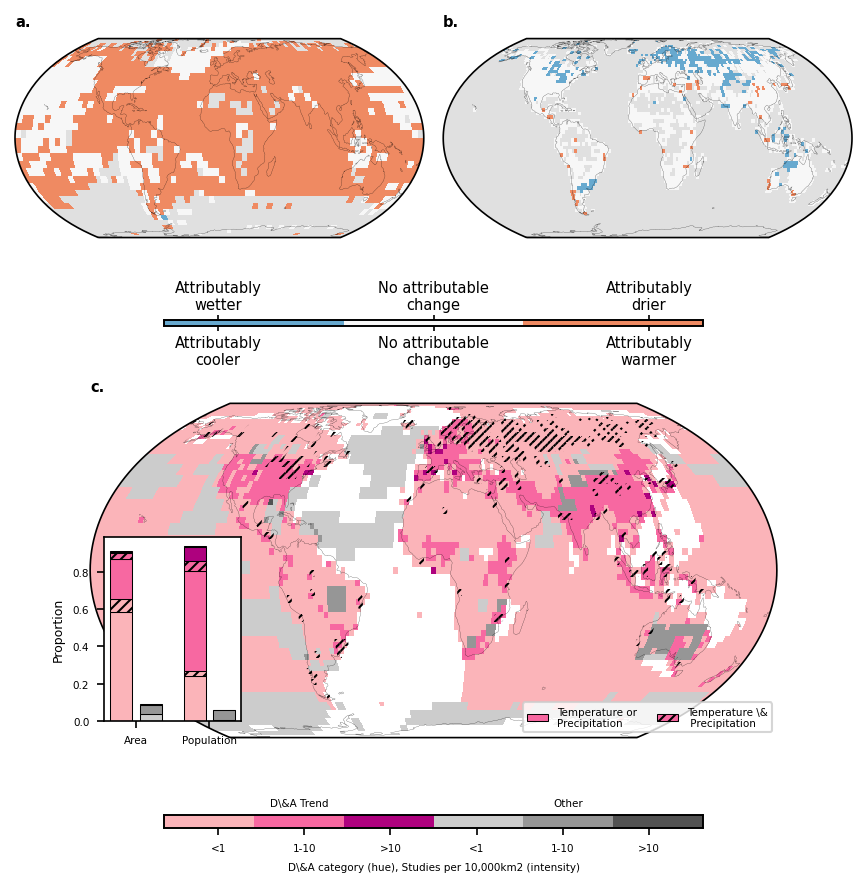

In [53]:
lots = 10
little = 1
study_grid_df = cat_evidence(study_grid_df, lots, little, 'total_study_prop')

import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,7), dpi=150, constrained_layout=False)
w_r = [1,2,2,1]

h_r = [1.25,0.1,2,0.1]
gs = fig.add_gridspec(4, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(grid_df, axb, 'precip_da_simplified', s_precip_colors, -1, 1)

## Cbar
cax = plt.subplot(gs[1,1:3])


    
s_double_cbar(mesh, cax, 0.4)


axc  = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())

axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )


axins = axc.inset_axes([0.02,0.05,0.2,0.55])

handles = inset_figure(axins, study_grid_df, colors)

axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)


mesh = sum_figure(axc, study_grid_df, colors)

## Colorbar
cax = plt.subplot(gs[3,1:3])


    
rg_cbar(cax,mesh,0.8)

(0.0, 1.0)


/tmp/ipykernel_60539/2758391399.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lmin['LON'] = df['LON'].max()+degrees*0.5


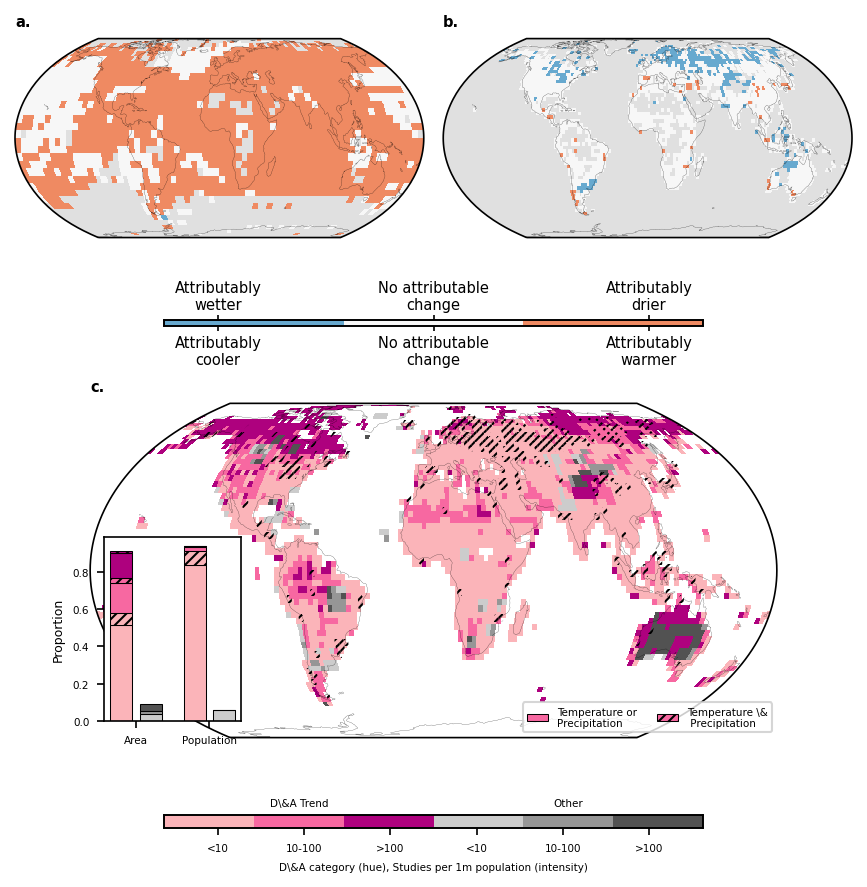

In [58]:
lots = 100
little = 10
study_grid_df = cat_evidence(study_grid_df, lots, little, 'total_study_pp')
study_grid_df.loc[~mask,'evidence_cat'] = np.nan


title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,7), dpi=150, constrained_layout=False)
w_r = [1,2,2,1]

h_r = [1.25,0.1,2,0.1]
gs = fig.add_gridspec(4, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
precip_colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
mesh = plot_da(grid_df, axa, 'temp_da_simplified', s_precip_colors[::-1], -1, 1)

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(grid_df, axb, 'precip_da_simplified', s_precip_colors, -1, 1)

## Cbar
cax = plt.subplot(gs[1,1:3])
    
s_double_cbar(mesh, cax, 0.4)


axc  = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())

axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )


mesh = sum_figure(axc, study_grid_df, colors)

axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)

axins = axc.inset_axes([0.02,0.05,0.2,0.55])

handles = inset_figure(axins, study_grid_df, colors)



## Colorbar
cax = plt.subplot(gs[3,1:3])
    
rg_cbar(cax,mesh,0.8, lab='D\&A category (hue), Studies per 1m population (intensity)')

In [ ]:
# per who area: number of people living in human-attributable areas vs number of studies on each health impacts